<a href="https://colab.research.google.com/github/YASWANTH104/Mushroom-Classification/blob/main/SVM_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement : Mashroom Classification
### Safe to eat or deadly poison?

### Dataset Information: (classes: edible=e, poisonous=p)

- **cap-shape**: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

- **cap-surface**: fibrous=f,grooves=g,scaly=y,smooth=s

- **cap-color**: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

- **bruises**: bruises=t,no=f

- **odor**: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

- **gill-attachment**: attached=a,descending=d,free=f,notched=n

- **gill-spacing**: close=c,crowded=w,distant=d

- **gill-size**: broad=b,narrow=n

- **gill-color**: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

- **stalk-shape**: enlarging=e,tapering=t

- **stalk-root**: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

- **stalk-surface-above-ring**: fibrous=f,scaly=y,silky=k,smooth=s

- **stalk-surface-below-ring**: fibrous=f,scaly=y,silky=k,smooth=s

- **stalk-color-above-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- **stalk-color-below-ring**: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

- **veil-type**: partial=p,universal=u

- **veil-color**: brown=n,orange=o,white=w,yellow=y

- **ring-number**: none=n,one=o,two=t

- **ring-type**: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

- **spore-print-color**: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

- **population**: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

- **habitat**: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [2]:
# Read the CSV file
data = pd.read_csv('/content/mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Exploratory Data Analysis

**In the EDA step, we will visualize each feature by its class distribution. The "class" refers that the information of this mushroom is edible or poisonous.**

# Mushroom Class

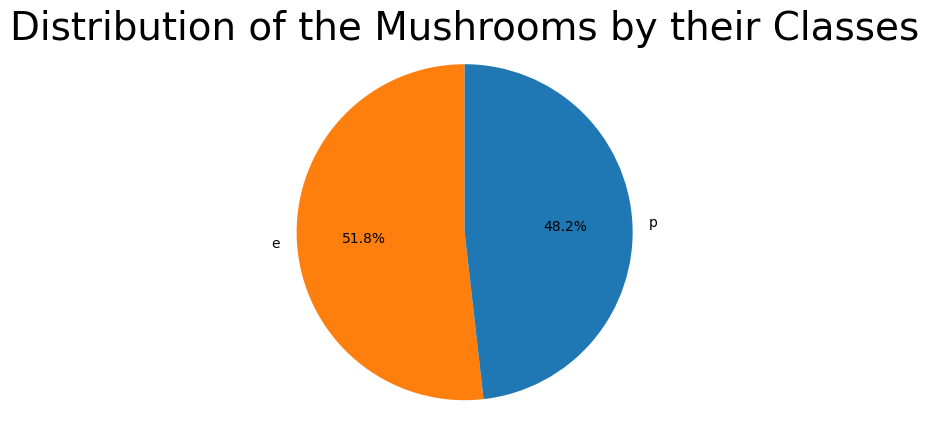

In [3]:
counts = data['class'].value_counts()

plt.pie(counts, labels=counts.index,autopct='%1.1f%%',colors=['#ff7f0e', '#1f77b4'], startangle=90)
plt.title('Distribution of the Mushrooms by their Classes', fontsize=28)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular
plt.show()

# Cap Shapes

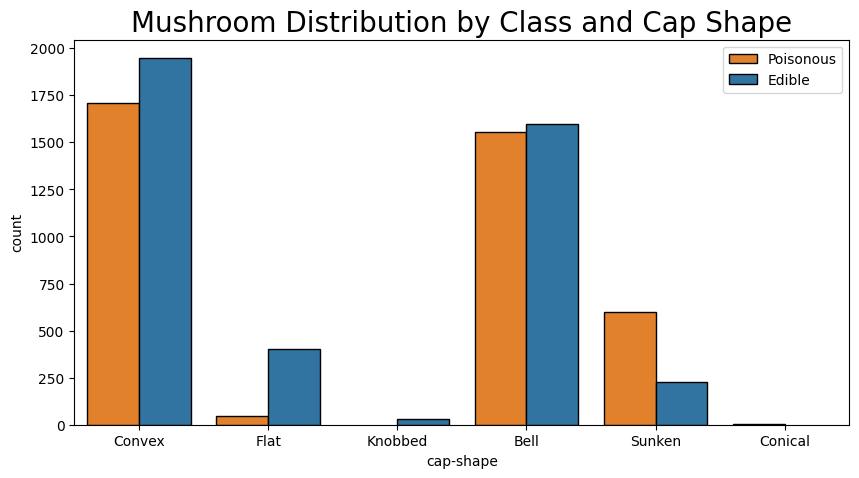

In [5]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=data, x='cap-shape', hue='class',
                      palette=['#ff7f0e', '#1f77b4'], edgecolor='black')

splot.set_xticklabels(['Convex', 'Flat', 'Knobbed', 'Bell', 'Sunken', 'Conical'])

plt.legend(labels=['Poisonous', 'Edible'])
plt.title('Mushroom Distribution by Class and Cap Shape', fontsize=20)
plt.show()


# Cap Surfaces


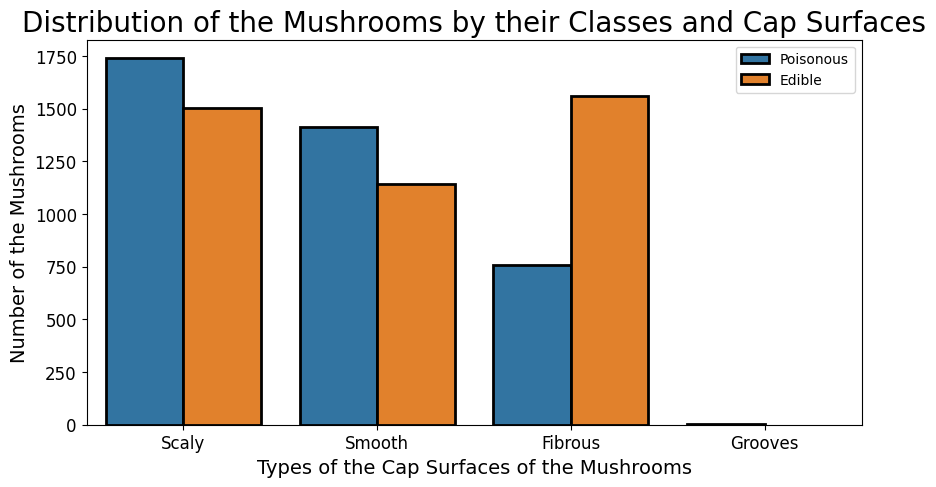

In [6]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=data, x='cap-surface', hue='class',
                      order=data['cap-surface'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'],
                      edgecolor='black', linewidth=2)

splot.set_xticklabels(['Scaly', 'Smooth', 'Fibrous', 'Grooves'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Cap Surfaces of the Mushrooms', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes and Cap Surfaces', fontsize=20)
plt.show()


# Cap Colors

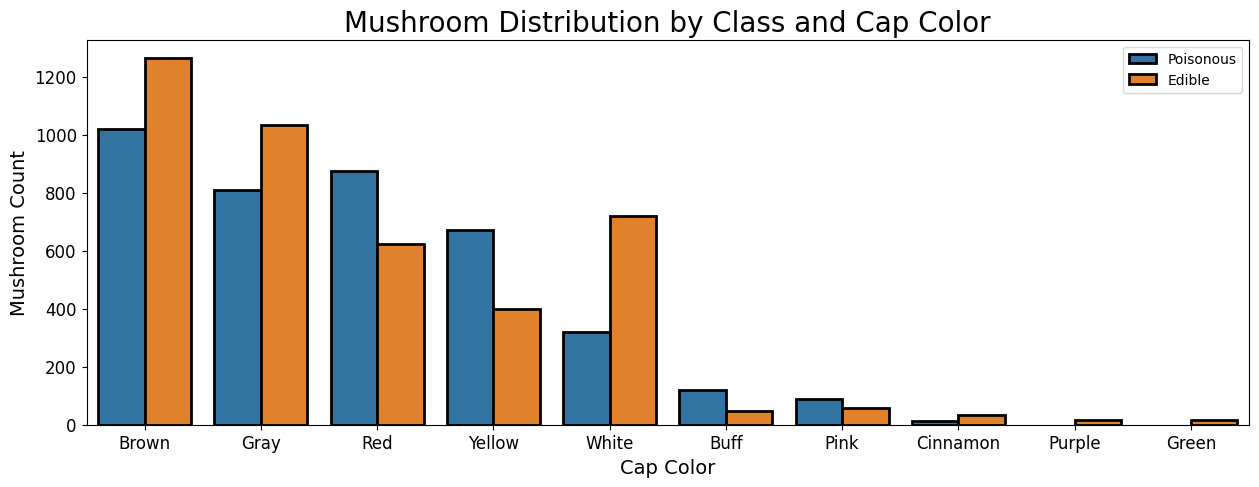

In [7]:
plt.figure(figsize=(15, 5))
splot = sns.countplot(data=data, x='cap-color', hue='class',
                      order=data['cap-color'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['Brown', 'Gray', 'Red', 'Yellow', 'White', 'Buff', 'Pink', 'Cinnamon', 'Purple', 'Green'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Cap Color', fontsize=14)
plt.title('Mushroom Distribution by Class and Cap Color', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Brown, gray, and red caps have similar counts of edible and poisonous mushrooms.
- White cap mushrooms are mostly edible.
- Purple and green caps have no poisonous mushrooms.


# Bruises

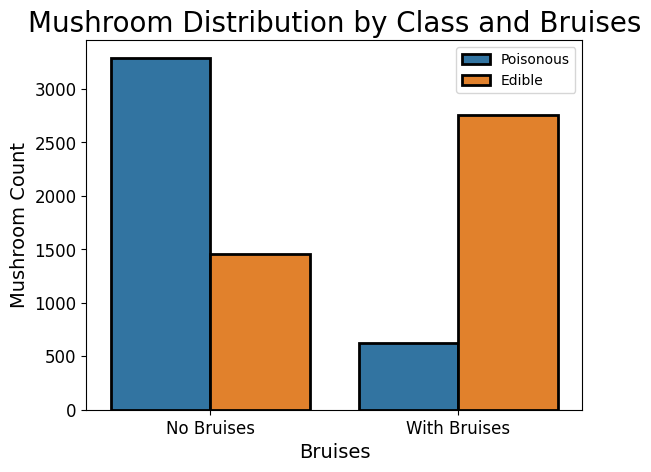

In [8]:
#plt.figure(figsize=(10, 5))
splot = sns.countplot(data=data, x='bruises', hue='class',
                      order=data['bruises'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['No Bruises', 'With Bruises'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Bruises', fontsize=14)
plt.title('Mushroom Distribution by Class and Bruises', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Mushrooms without bruises are mostly poisonous.
- Mushrooms with bruises are mostly edible.

# Odor

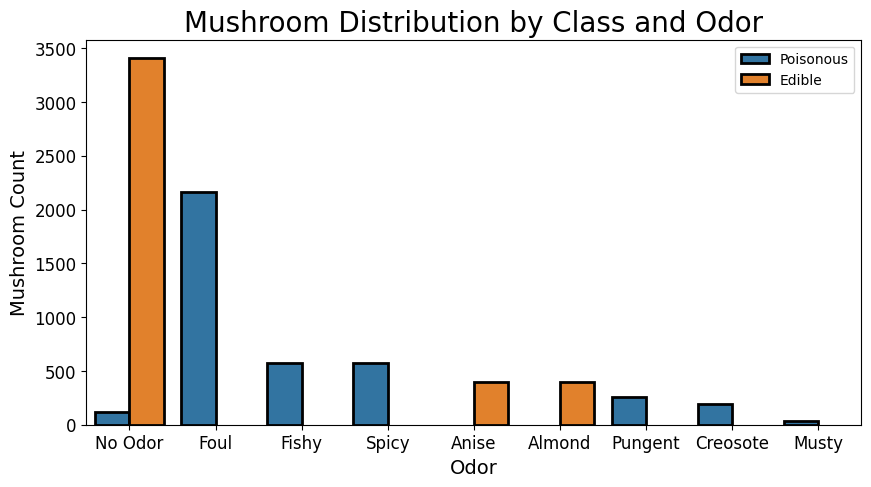

In [9]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=data, x='odor', hue='class',
                      order=data['odor'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['No Odor', 'Foul', 'Fishy', 'Spicy', 'Anise', 'Almond', 'Pungent', 'Creosote', 'Musty'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Odor', fontsize=14)
plt.title('Mushroom Distribution by Class and Odor', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Mushrooms with no odor are mostly safe.
- Mushrooms with foul, fishy, and spicy odors are mostly poisonous.
- Mushrooms with anise and almond odors have no poisonous types.

# Gill Attachments


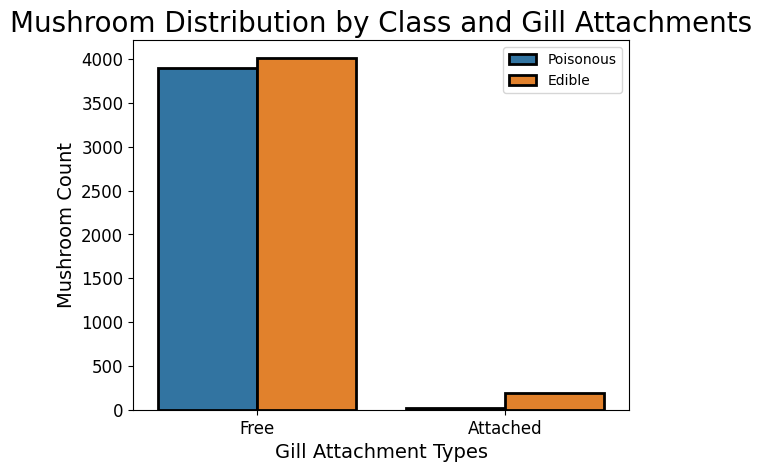

In [10]:
splot = sns.countplot(data=data, x='gill-attachment', hue='class',
                      order=data['gill-attachment'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['Free', 'Attached'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Gill Attachment Types', fontsize=14)
plt.title('Mushroom Distribution by Class and Gill Attachments', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


- Free type gill attachments are most common and equally distributed between classes.
- Attached type gill attachments are mostly edible.

# Gill Spacing


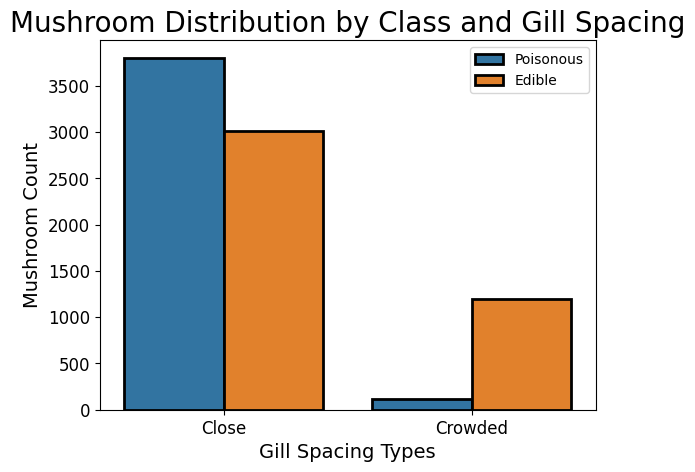

In [11]:
splot = sns.countplot(data=data, x='gill-spacing', hue='class',
                      order=data['gill-spacing'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['Close', 'Crowded'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Gill Spacing Types', fontsize=14)
plt.title('Mushroom Distribution by Class and Gill Spacing', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


- Crowded gill spacing is mostly edible.
- Close gill spacing has a nearly equal distribution of edible and poisonous mushrooms.

# Gill Color

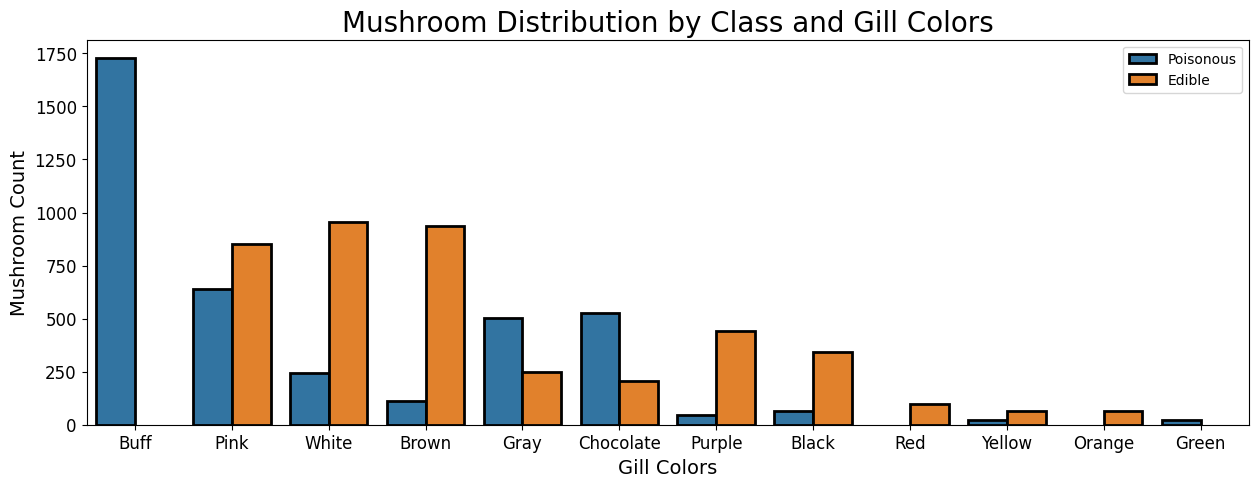

In [12]:
plt.figure(figsize=(15, 5))
splot = sns.countplot(data=data, x='gill-color', hue='class',
                      order=data['gill-color'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['Buff', 'Pink', 'White', 'Brown', 'Gray', 'Chocolate', 'Purple', 'Black', 'Red', 'Yellow', 'Orange', 'Green'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Gill Colors', fontsize=14)
plt.title('Mushroom Distribution by Class and Gill Colors', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Buff-colored gills are mostly poisonous.
- White, brown, purple, black, and red gills are mostly edible.

# Stalk Shape


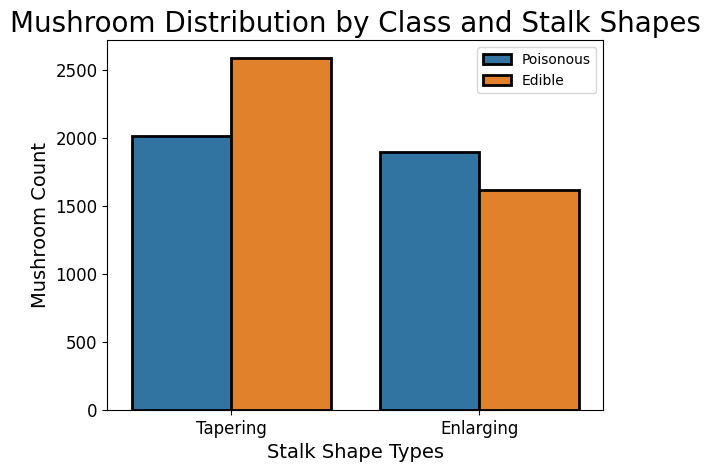

In [13]:
plt.plot(figsize=(10, 5))
splot = sns.countplot(data=data, x='stalk-shape', hue='class',
                      order=data['stalk-shape'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['Tapering', 'Enlarging'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Stalk Shape Types', fontsize=14)
plt.title('Mushroom Distribution by Class and Stalk Shapes', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Stalk Root

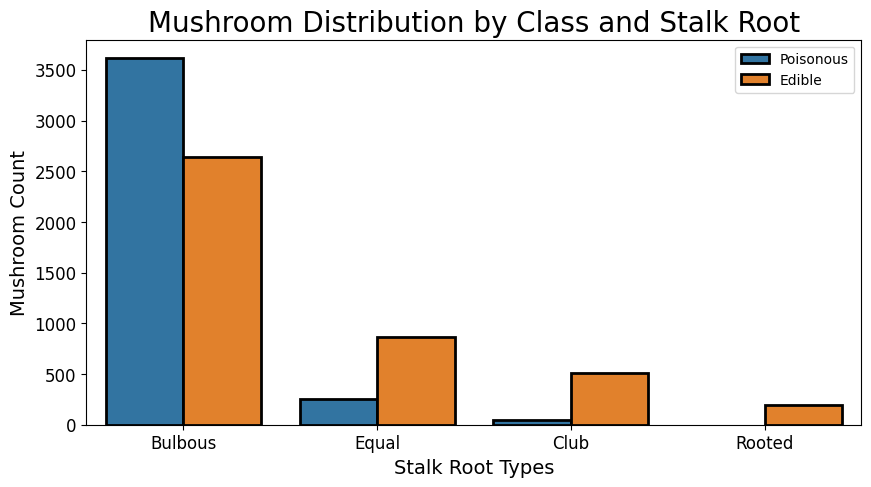

In [15]:
# Fill missing values in 'stalk-root' with the most frequent object 'b'
data = data.replace(['?'], 'b')

plt.figure(figsize=(10, 5))
splot = sns.countplot(data=data, x='stalk-root', hue='class',
                      order=data['stalk-root'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['Bulbous', 'Equal', 'Club', 'Rooted'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Stalk Root Types', fontsize=14)
plt.title('Mushroom Distribution by Class and Stalk Root', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

# Stalk Surface Above and Below Ring

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Stalk Surfaces Above Ring')

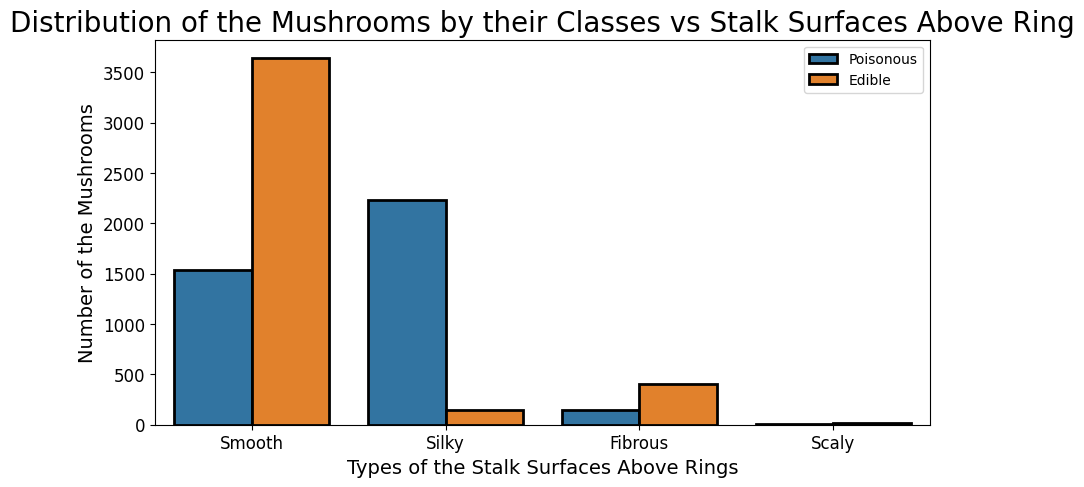

In [16]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=data, x='stalk-surface-above-ring',
                      hue='class',
                      order=data['stalk-surface-above-ring'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'],
                      edgecolor=(0, 0, 0),
                      linewidth=2)

splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Types of the Stalk Surfaces Above Rings', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Stalk Surfaces Above Ring', fontsize=20)


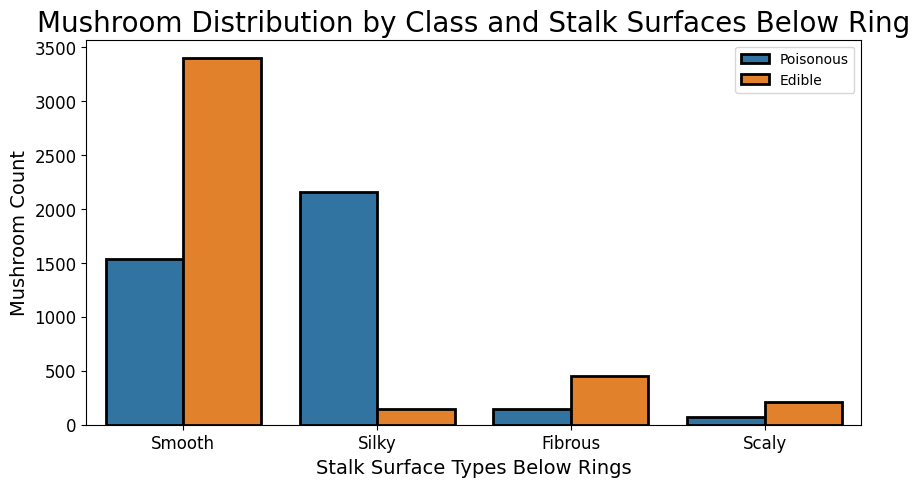

In [17]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=data, x='stalk-surface-below-ring', hue='class',
                      order=data['stalk-surface-below-ring'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['Smooth', 'Silky', 'Fibrous', 'Scaly'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Stalk Surface Types Below Rings', fontsize=14)
plt.title('Mushroom Distribution by Class and Stalk Surfaces Below Ring', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

# Veil Types


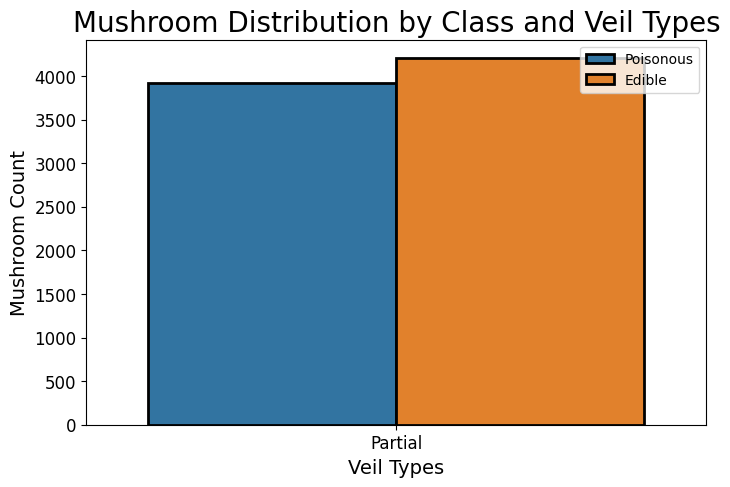

In [18]:
plt.figure(figsize=(8, 5))
splot = sns.countplot(data=data, x='veil-type', hue='class',
                      order=data['veil-type'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['Partial'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Veil Types', fontsize=14)
plt.title('Mushroom Distribution by Class and Veil Types', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

- The dataset includes only partial type veils.
- Most partial type veils are edible, but the number of poisonous mushrooms is close to that of edible mushrooms.

# Veil Colors

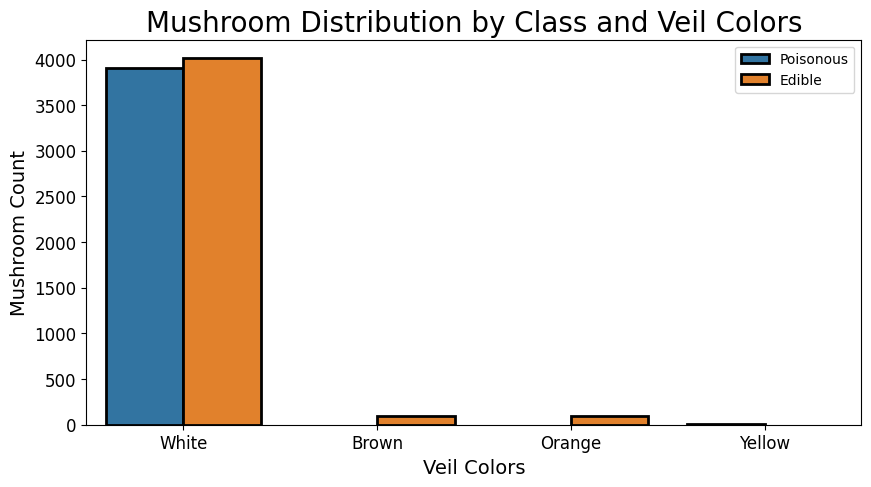

In [19]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=data, x='veil-color', hue='class',
                      order=data['veil-color'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['White', 'Brown', 'Orange', 'Yellow'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Veil Colors', fontsize=14)
plt.title('Mushroom Distribution by Class and Veil Colors', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

- Most mushrooms have white veils, with an approximately equal class distribution.
- Brown, orange, and yellow veil-colored mushrooms have no poisonous types.

# Number of the Rings

In [24]:
import plotly.figure_factory as ff

x = ['None', 'One', 'Two']
y = ['Poisonous', 'Edible']
z = [
    [data[data['class'] == 'p']['ring-number'].value_counts().get(i, 0) for i in range(3)],
    [data[data['class'] == 'e']['ring-number'].value_counts().get(i, 0) for i in range(3)]
]

# Create the heatmap using figure_factory
fig = ff.create_annotated_heatmap(z, x=x, y=y, colorscale='Viridis')
fig.update_layout(
    title_text='Heatmap of Mushrooms by Classes vs Number of Rings',
    title_x=0.5,
    title_font=dict(size=22),
    xaxis=dict(tickfont=dict(size=15)),
    yaxis=dict(tickfont=dict(size=15))
)
fig.show()

[ring-number
 o    3808
 t      72
 n      36
 Name: count, dtype: int64]

# Ring Types


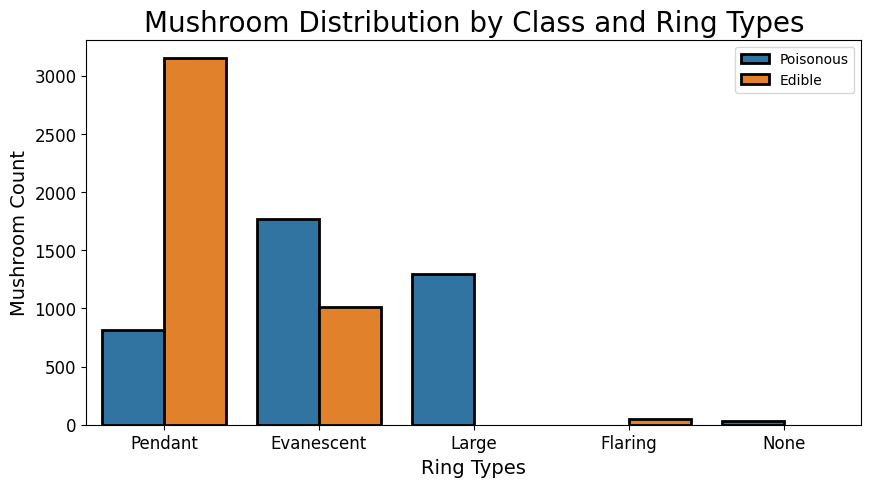

In [25]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=data, x='ring-type', hue='class',
                      order=data['ring-type'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['Pendant', 'Evanescent', 'Large', 'Flaring', 'None'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Ring Types', fontsize=14)
plt.title('Mushroom Distribution by Class and Ring Types', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

- Pendant type rings are mostly edible.
- Large type rings contain only poisonous mushrooms.

# Spore Print Colors

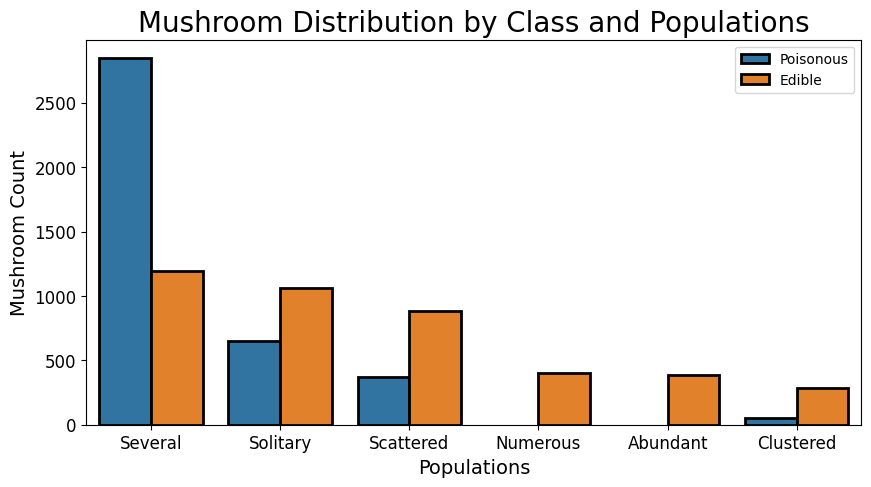

In [26]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=data, x='population', hue='class',
                      order=data['population'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Populations', fontsize=14)
plt.title('Mushroom Distribution by Class and Populations', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

- White and chocolate spore print colored mushrooms are mostly poisonous.
- Brown and black spore print colored mushrooms are mostly edible.

# Populations

Text(0.5, 1.0, 'Distribution of the Mushrooms by their Classes vs Populations')

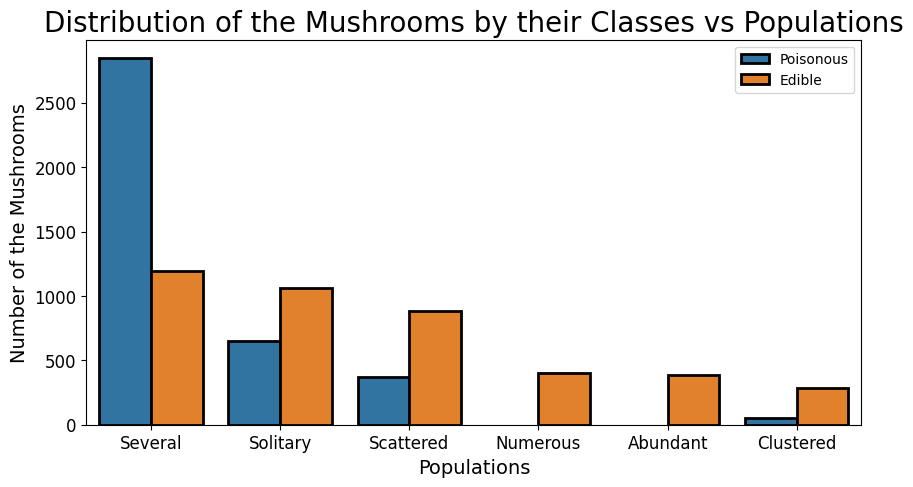

In [27]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=data, x='population', hue='class',
                      order=data['population'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'],
                      edgecolor=(0, 0, 0), linewidth=2)

splot.set_xticklabels(['Several', 'Solitary', 'Scattered', 'Numerous', 'Abundant', 'Clustered'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Number of the Mushrooms', fontsize=14)
plt.xlabel('Populations', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Distribution of the Mushrooms by their Classes vs Populations', fontsize=20)

- Mushrooms with "Several" populations are mostly poisonous.
- Mushrooms with "Numerous," "Abundant," and "Clustered" populations are mostly edible.

# Habitats

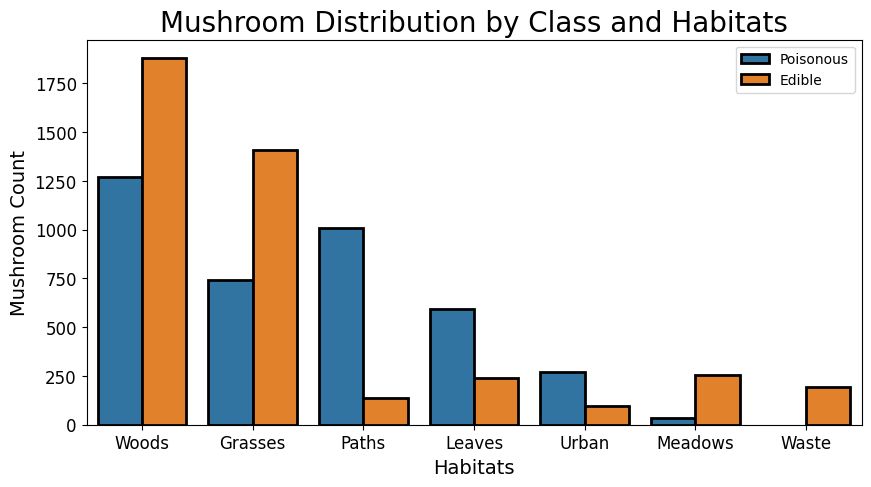

In [28]:
plt.figure(figsize=(10, 5))
splot = sns.countplot(data=data, x='habitat', hue='class',
                      order=data['habitat'].value_counts().index,
                      palette=['#1f77b4', '#ff7f0e'], edgecolor='black', linewidth=2)

splot.set_xticklabels(['Woods', 'Grasses', 'Paths', 'Leaves', 'Urban', 'Meadows', 'Waste'])

plt.legend(['Poisonous', 'Edible'], loc='upper right')
plt.ylabel('Mushroom Count', fontsize=14)
plt.xlabel('Habitats', fontsize=14)
plt.title('Mushroom Distribution by Class and Habitats', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

# Data Pre-Process

**In this step, we will check for the missing data points and then, encode the string data types. According to dataset exploration, all columns have string-type data.**

In [29]:
count_NaN = data.isna().sum()
count_NaN

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


In [30]:
X = data.drop(['class'], axis=1)
y = data['class']

In [31]:
X.shape

(8124, 22)

In [32]:
y.shape

(8124,)

In [33]:
y.value_counts()

,count
class,
e,4208
p,3916


In [34]:
X.dtypes.value_counts()

,count
object,22


## Label Encoding

In [35]:
# Encoding the string-type data points

X_enc = X.copy()
for col in X.columns:
  lb = LabelEncoder()
  X_enc[col] = lb.fit_transform(X[col])

y_enc = lb.fit_transform(y)

X_enc.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [36]:
y_enc

array([1, 0, 0, ..., 0, 1, 0])

In [37]:
X.shape, X_enc.shape

((8124, 22), (8124, 22))

## Train-Test Split
The sequence of `X_train, X_test, y_train, y_test` is important because it stores the corresponding values

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.2, random_state=42)
X_train.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
7873,3,2,2,0,7,1,0,1,0,1,...,1,6,7,0,2,1,0,7,4,0
6515,5,2,4,0,2,1,0,1,0,1,...,2,7,7,0,2,1,0,7,4,4
6141,2,3,2,0,8,1,0,1,0,1,...,2,6,7,0,2,1,0,7,4,2
2764,2,0,4,1,5,1,0,0,9,1,...,2,3,6,0,2,1,4,3,4,0
438,0,3,9,1,3,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,3


In [39]:
# y_train set which is labels
y_train

array([1, 1, 1, ..., 0, 1, 0])

# Build SVM


In [48]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [49]:
svc.score(X_test, y_test)

0.9913846153846154

In [50]:
svc.score(X_train, y_train)

0.9906139406062471

Wow! A perfect Score of 1 (almost).